In [ ]:
import pandas as pd
import json

path_1 = "/workspaces/fastmoonStreams/sample_data/pandasdf/books_unprocessed.csv"
path_2 = "/workspaces/fastmoonStreams/sample_data/pandasdf/books.csv"
path_3 = "/workspaces/fastmoonStreams/sample_data/pandasdf/books_processed.csv"

df_unprocessed = pd.read_csv(path_1)
df = pd.read_csv(path_2)
df_processed = pd.read_csv(path_3)

0
0


C:\Users\Pasha\AppData\Local\Temp\ipykernel_14532\3643173267.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation=90, fontsize=14)
C:\Users\Pasha\AppData\Local\Temp\ipykernel_14532\3643173267.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation=90, fontsize=14)


0
0
0
0
None is not in the list for ois_binance_api_perpetual_inverse_oi_btc.json.
0
None is not in the list for trades_buys_perpetual_binance_ws_perpetual_linear_trades_bulk.json.
0
None is not in the list for trades_delta_perpetual_binance_ws_perpetual_linear_trades_bulk.json.
-0.08200000000000002
None is not in the list for trades_sells_perpetual_binance_ws_perpetual_linear_trades_bulk.json.
0
None is not in the list for trades_total_binance_ws_perpetual_inverse_trades_btcusdperp.json.
0
None is not in the list for trades_total_perpetual_binance_ws_perpetual_linear_trades_bulk.json.
0


C:\Users\Pasha\AppData\Local\Temp\ipykernel_14532\3643173267.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation=90, fontsize=14)
C:\Users\Pasha\AppData\Local\Temp\ipykernel_14532\3643173267.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation=90, fontsize=14)
C:\Users\Pasha\AppData\Local\Temp\ipykernel_14532\3643173267.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation=90, fontsize=14)
C:\Users\Pasha\AppData\Local\Temp\ipykernel_14532\3643173267.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation=90, fontsize=14)
C:\Users\Pasha\A

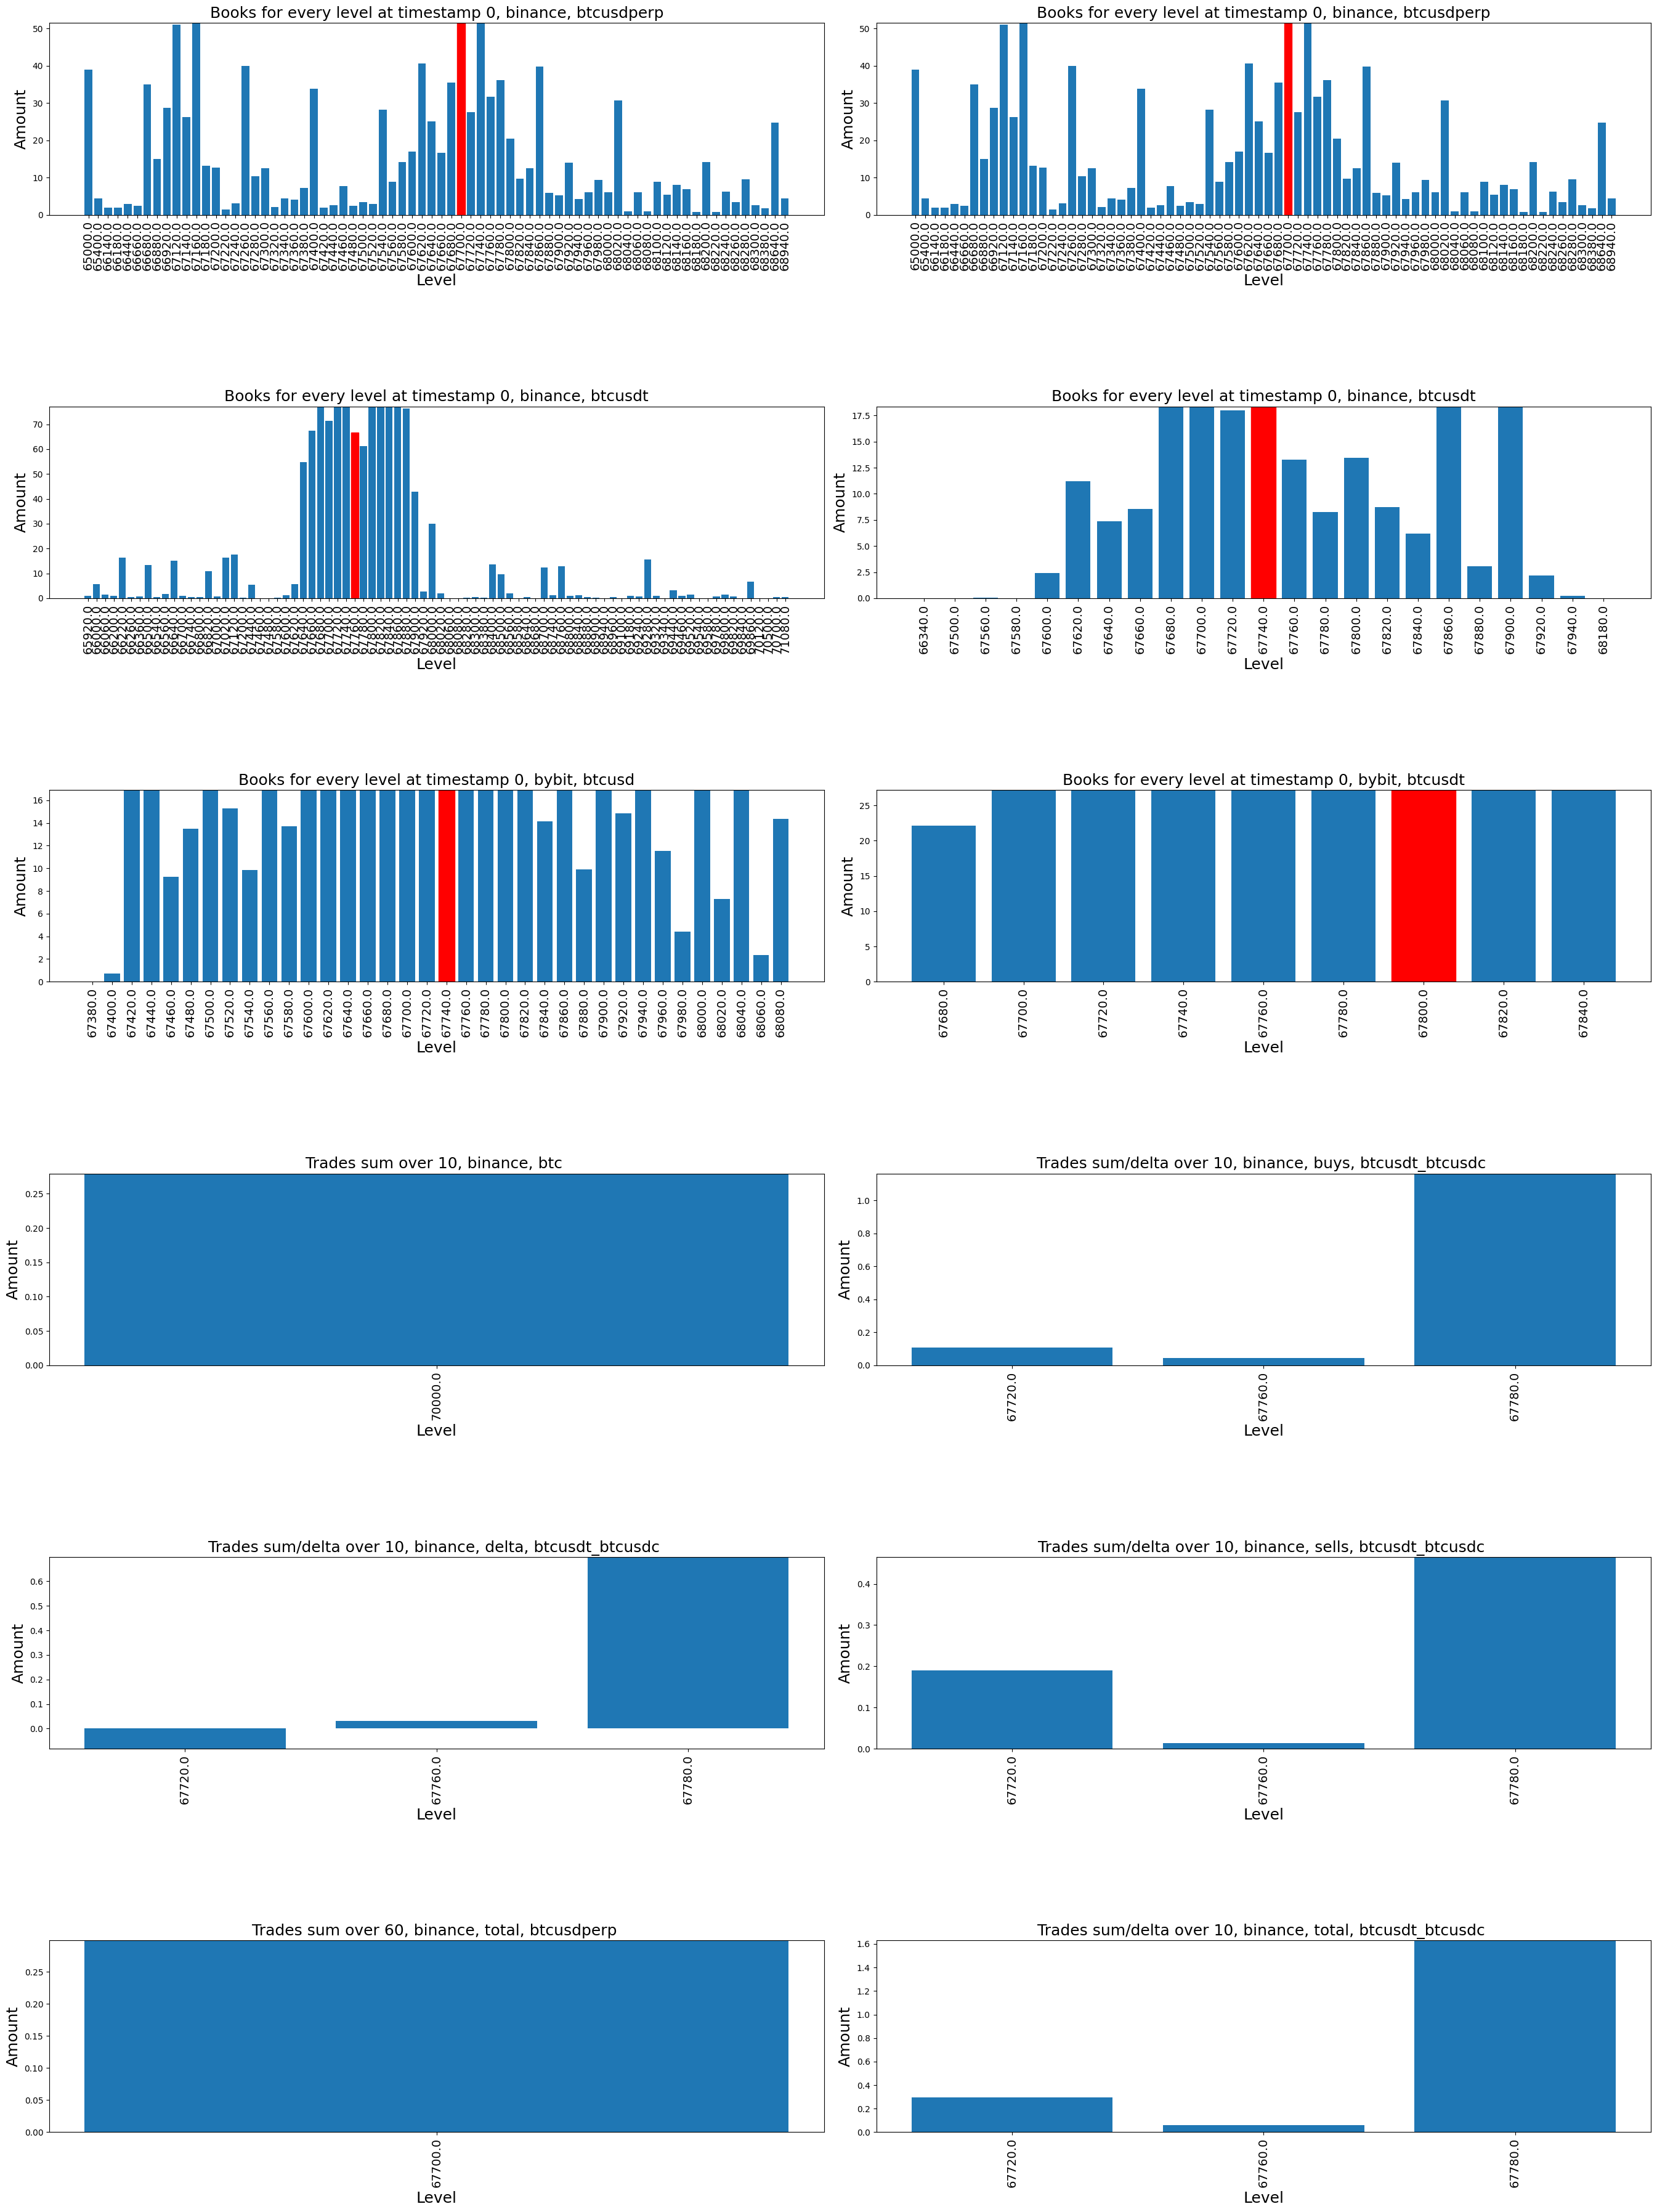

In [29]:
import matplotlib.pyplot as plt
import json
import os

data_dir = "sample_data/plots"
plot_files = [f for f in os.listdir(data_dir) if f.endswith('.json')]
num_plots = len(plot_files)

cols = 2  # Number of columns in the subplot grid (2 plots per row)
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate rows needed
fig, axes = plt.subplots(rows, cols, figsize=(27, 36))  # Adjust the layout and size as needed
axes = axes.flatten()
for i, plot_file in enumerate(plot_files):
    plot_data = json.load(open(os.path.join(data_dir, plot_file), "r"))
    x = [str(x) for x in plot_data['x']]
    y = plot_data['y']
    price = str(plot_data.get("price"))

    try:
        special_bar_index = x.index(price)
    except ValueError:
        special_bar_index = None
        print(f'{price} is not in the list for {plot_file}.')

    ax = axes[i]
    bars = ax.bar(x, y)

    if special_bar_index is not None and "depth" in plot_file:
        bars[special_bar_index].set_color('red')
        # ax.text(x=special_bar_index + 0.2, y=y[special_bar_index] - (max(y) / 30), s='Current price', ha='left', fontsize=8, color='red')


    min_y = min(y)  if min(y) < 0 else 0
    ax.set_ylim(bottom=min_y, top=max(y) / 3)
    ax.set_xlabel(plot_data['xlabel'], fontsize=18)
    ax.set_ylabel(plot_data['ylabel'], fontsize=18)
    ax.set_title(plot_data['legend'], fontsize=18)
    ax.set_xticklabels(x, rotation=90, fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=1)  # Adjust hspace as needed to reduce space between rows

# Display the plot
plt.show()

In [4]:
def merge_suffixes(n):
    """
        The maximum amount of datasets to aggregate is the len(alphabet). 
        Modify this function to get more aggregation possibilities
    """
    alphabet = 'xyzabcdefghijklmnopqrstuvw'
    suffixes = [f'_{alphabet[i]}' for i in range(n)]
    return suffixes

print(merge_suffixes(2))

['_x', '_y']


In [2]:
from ProcessCenter.DataFlow import MarketDataFusion
from ProcessCenter.tests.dataflow import _test_flow, test_mergers

mergers = test_mergers()
df = mergers.test_books("perpetual")

df[0]

,65000.0,65400.0,66140.0,66180.0,66440.0,66660.0,66680.0,66880.0,66920.0,67120.0,...,68180.0,68200.0,68220.0,68240.0,68260.0,68280.0,68300.0,68380.0,68640.0,68940.0
0,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,0.688571,14.124286,0.814286,6.148571,3.381429,9.552857,2.554286,1.728571,24.78,4.422857
1,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,0.688571,14.124286,0.814286,6.148571,3.381429,9.552857,2.554286,1.728571,24.78,4.422857
2,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,0.688571,14.124286,0.814286,6.148571,3.381429,9.552857,2.554286,1.728571,24.78,4.422857
3,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,0.688571,14.124286,0.814286,6.148571,3.381429,9.552857,2.554286,1.728571,24.78,4.422857
4,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,0.688571,14.124286,0.814286,6.148571,3.381429,9.552857,2.554286,1.728571,24.78,4.422857
5,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,0.688571,14.124286,0.814286,6.148571,3.381429,9.552857,2.554286,1.728571,24.78,4.422857
6,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,0.688571,14.124286,0.814286,6.148571,3.381429,9.552857,2.554286,1.728571,24.78,4.422857
7,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,0.688571,14.124286,0.814286,6.148571,3.381429,9.552857,2.554286,0.864286,24.78,4.422857
8,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,0.688571,14.124286,0.814286,6.148571,3.381429,9.552857,2.554286,0.864286,24.78,4.422857
9,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,32.522857,14.971429,28.701429,51.05,...,0.688571,14.124286,0.814286,6.148571,3.381429,9.552857,2.554286,0.864286,24.78,4.422857


In [12]:
import pandas as pd

concatenated_df = pd.concat(df, axis=1, keys=merge_suffixes(len(df)))

In [14]:
concatenated_df.columns

MultiIndex([('_x', '65000.0'),
            ('_x', '65400.0'),
            ('_x', '66140.0'),
            ('_x', '66180.0'),
            ('_x', '66440.0'),
            ('_x', '66660.0'),
            ('_x', '66680.0'),
            ('_x', '66880.0'),
            ('_x', '66920.0'),
            ('_x', '67120.0'),
            ...
            ('_z', '68080.0'),
            ('_a', '67680.0'),
            ('_a', '67700.0'),
            ('_a', '67720.0'),
            ('_a', '67740.0'),
            ('_a', '67760.0'),
            ('_a', '67780.0'),
            ('_a', '67800.0'),
            ('_a', '67820.0'),
            ('_a', '67840.0')],
           length=199)

In [10]:
concatenated_df.columns = [f'{suffix}_{col}' for suffix, col in concatenated_df.columns]



In [11]:
concatenated_df

,_x_65000.0,_x_65400.0,_x_66140.0,_x_66180.0,_x_66440.0,_x_66660.0,_x_66680.0,_x_66880.0,_x_66920.0,_x_67120.0,...,_z_68080.0,_a_67680.0,_a_67700.0,_a_67720.0,_a_67740.0,_a_67760.0,_a_67780.0,_a_67800.0,_a_67820.0,_a_67840.0
0,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,14.352843,22.174,81.573,70.393,59.821,29.662,58.525,64.187,77.698,50.976
1,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,14.352843,22.174,81.573,70.393,59.821,29.662,58.525,64.187,77.698,50.976
2,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,14.352843,22.174,81.573,70.393,59.821,29.662,58.525,64.187,77.698,50.976
3,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,14.352843,22.147,74.192,70.391,59.821,28.869,58.525,64.187,78.568,50.976
4,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,14.352843,22.147,74.192,70.391,59.821,28.869,58.525,64.187,78.568,50.976
5,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,14.352843,22.174,81.573,69.724,59.892,30.150,55.649,64.187,77.698,50.976
6,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,14.352843,22.174,81.573,69.724,59.892,30.150,55.649,64.187,77.698,50.976
7,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,14.352843,22.174,81.573,69.724,59.892,33.338,57.071,64.187,77.698,50.976
8,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,34.910000,14.971429,28.701429,51.05,...,14.352843,22.174,81.573,69.724,59.892,33.338,57.071,64.187,77.698,50.976
9,38.942857,4.411429,1.885714,1.887143,2.842857,2.377143,32.522857,14.971429,28.701429,51.05,...,14.352843,22.174,81.573,70.393,59.819,29.662,58.506,64.187,77.698,50.976
